# Lab-08 : Qiskit-Runtime.Primitives like Sampler and Estimator, CHSH Inequality Voilation
We are going to talk about the properties of the entangled qubits using CHSH Inequality Voilation

- What is CHSH Inequality Voilation ? : "It explains that quantum mechanics can't be explained by a local hidden variable theory"

For Practical Experimentation of the CHSH Inequality Voilation. 

We are going to use `Qiskit-Runtime's` the two features from IBM Quantum i.e Qiskit
1. `qiskit.primitives : Sampler` It's used for abstract measurement and error mitigation for scalable quantum computing. We will use Sampler and Estimator Primitives.
2. `qiskit.primitives : Estimator` - 

In [48]:
from qiskit.circuit import QuantumCircuit
from qiskit.primitives import Estimator, Sampler
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter


import numpy as np

import matplotlib.pyplot as plt

## `Qiskit Runtime : qiskit.primitives` - `Sampler`

> Create a Quantum Circuit That puts the qubit into $\ket 1$ exited state.

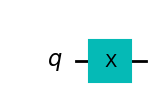

In [13]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output ="mpl")

> Create a Quantum Circuit that put the qubit into superposition state $\ket +$

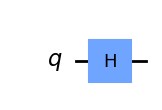

In [14]:
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
qc_plus.draw('mpl')

> Let's Measure These qubits into different basis using `Sampler`. We will use the `Sampler` to measure qubit into Z-basis. `Sampler` will count the number of the outcomes of the state $\ket 0 \; and \; \ket 1$, normalized by the number of experiments performed i.e shots.

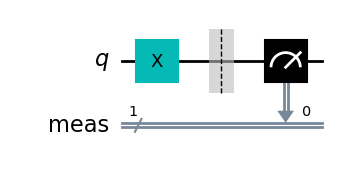

In [15]:
qc.measure_all()
qc.draw(output='mpl')

In [16]:
sampler = Sampler()
job = sampler.run(qc)
job.result().quasi_dists

[{1: 1.0}]

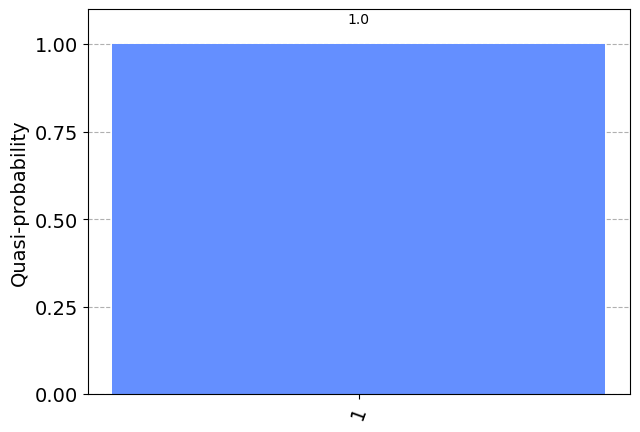

In [17]:
plot_histogram(job.result().quasi_dists)

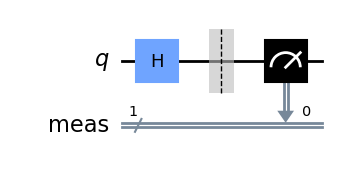

In [18]:
qc_plus.measure_all()
qc_plus.draw(output='mpl')

In [19]:
sampler  = Sampler()
job_plus = sampler.run(qc_plus)
job_plus.result().quasi_dists

[{0: 0.4999999999999999, 1: 0.4999999999999999}]

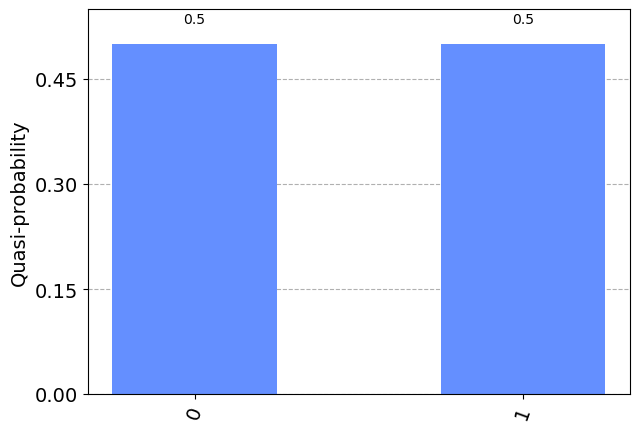

In [20]:
plot_histogram(job_plus.result().quasi_dists)

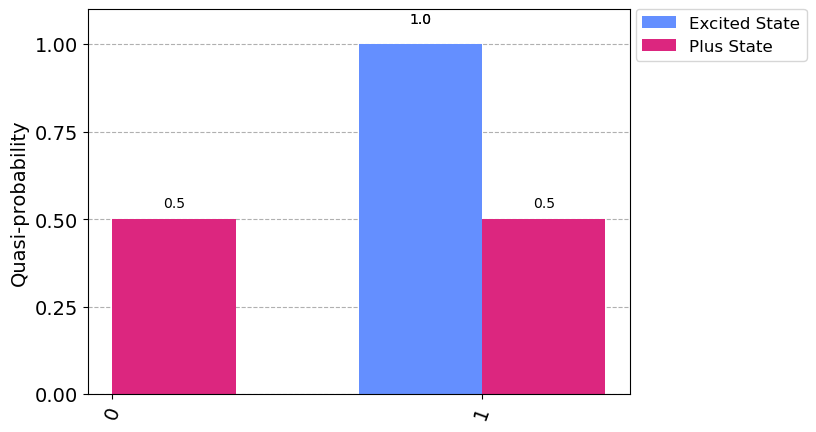

In [21]:
label = ["Excited State", "Plus State"] # TODO: Excited State does not appear
plot_histogram([job.result().quasi_dists[0], job_plus.result().quasi_dists[0]], legend=label)

The result for the excited state is always $|1\rangle$ wheres it is roughly half $|0\rangle$ and half $|1\rangle$ for the plus superposition state. This is because the $|0\rangle$ and $|1\rangle$ states are *eigenstates* of the $Z$ operator (with $+1$ and $-1$ eigenvalues, respectively).

> Let Measure these qubits into the $X$ basis using Sampler via rotating the qubit from $X$ basis to $Z$ basis for measurement.

In [31]:
qc.remove_final_measurements()
qc_plus.remove_final_measurements()

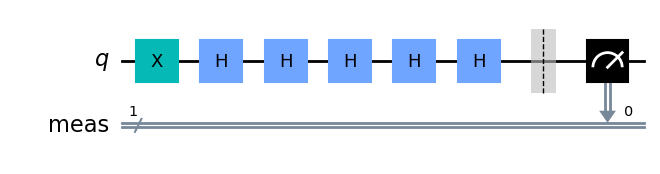

In [32]:
# rotate into the X-basis
qc.h(0)
qc_plus.h(0)
qc.measure_all()
qc.draw(output = 'mpl')


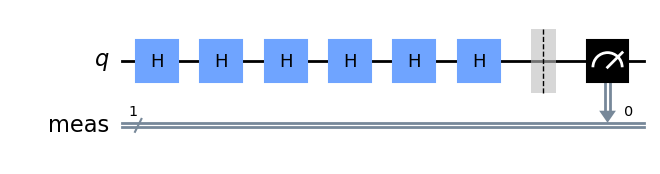

In [33]:
qc_plus.measure_all()
qc_plus.draw(output = 'mpl')


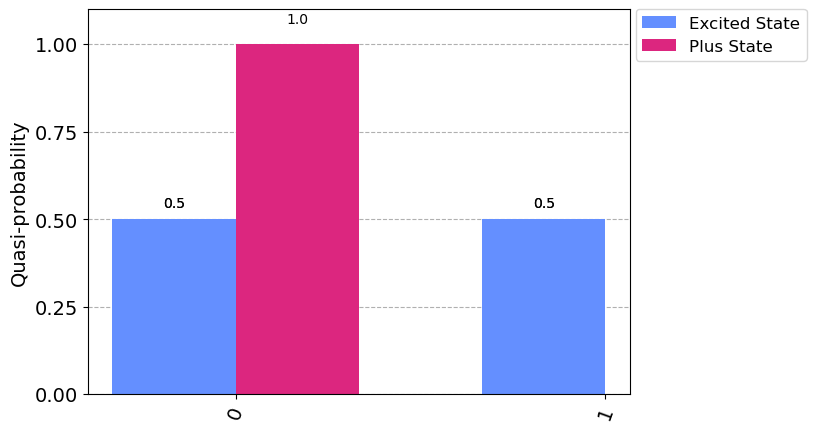

In [34]:
sampler = Sampler()
job = sampler.run(qc)
job_plus = sampler.run(qc_plus)
plot_histogram([job.result().quasi_dists[0], job_plus.result().quasi_dists[0]], legend=label)

The result is total opposite of the previouse one i.e the plus superposition always give the 1 result, hence an eigenstate of the $X$ operator, whereas the excited $|1\rangle$ yields a roughtly fifty-fifty split. The $|+\rangle$ and $|-\rangle$ states are eigenstates of the $X$ operator, with eigenvalues $+1$ and $-1$, respectively. 

## `Qiskit Runtime : qiskit.primitives` - `Estimator`
> It is used for abstract measurement into the Estimator primitive as observable. We don't add measurements to the circuits, we use a list of obervables which take the form of Pauli strings for `Estimator()`.

Hence, In the measurement of a qubit we only specify the Basis State like Z for Z-basis and X for X-basis.

In [37]:
qc = QuantumCircuit(1)
qc.x(0)

qc_plus = QuantumCircuit(1)
qc_plus.h(0)

observables = list(SparsePauliOp(['Z', 'X']))
observables

[SparsePauliOp(['Z'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['X'],
               coeffs=[1.+0.j])]

In [42]:
estimator = Estimator()
job = estimator.run([qc]*len(observables), observables=observables)
job_plus = estimator.run([qc_plus]*len(observables), observables=observables)
print(f'    |   <Z>   |   <X> ')
print(f'----|------------------')
print(f'|1> | {job.result().values[0]}    | {job.result().values[1]}')
print(f'|+> | {job_plus.result().values[0]} | {job_plus.result().values[1]}')

    |   <Z>   |   <X> 
----|------------------
|1> | -1.0    | 0.0
|+> | 0.0 | 0.9999999999999998


We can see that $\ket 1$ state in the Z-basis is -1 and around zero in the X-basis. similarly for the $\ket +$ qubit also.

### CHSH Inequality
Let's assume that Alice and Bob are given each one part of a bipartite entangled system. Each of them then performs two measurements on their part in two different bases. Let's call Alice's bases A and a and Bob's B and b. What is the expectation value of the quantity 

$$
\langle CHSH \rangle = \langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle ?
$$

Alice and Bob have one qubit each, so any measurement they perform on their system (qubit) can only yield one of two possible outcomes: +1 or -1.

So, if any measurement of A, a, B, and b can only yield $\pm 1$, the quantities $(B-b)$ and $(B+b)$ can only be 0 or $\pm 2$. And thus, the quantity $A(B-b) + a(B+b)$ can only be either +2 or -2, which means that there should be a bound for the expectation value of the quantity we have called

$$
|\langle CHSH \rangle| = |\langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle| \le 2.
$$

Step-01 : To build the observable
$$
CHSH = A(B-b) + a(B+b) = AB - Ab + aB +ab
$$
where $A, a$ are each one of $\{IX, IZ\}$ for qubit 0 and $B, b$ are each one of $\{XI, ZI\}$ for qubit 1 

In [47]:
A, a, B, b = SparsePauliOp(["Z", "X", "Z", "X"])

obsv = A.tensor(B) - A.tensor(b)+ a.tensor(B) + a.tensor(b)  # create operator for chsh witness
obsv

SparsePauliOp(['ZZ', 'ZX', 'XZ', 'XX'],
              coeffs=[ 1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j])

We will be going to test the $CHSH$ obervables on an entangled qubit pair i.e maximally-entangled bell states 
$$
|\Phi\rangle = \frac{1}{\sqrt{2}} \left(|00\rangle + |11\rangle \right)
$$

The Output State will be 
$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left(\cos(\theta/2) |00\rangle + \sin(\theta/2)|11\rangle \right)
$$


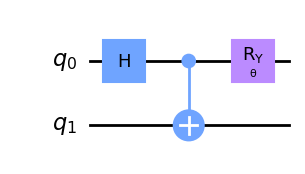

In [49]:
# lets set the angle rotation parameter
theta = Parameter('θ')
# create the quantum circuits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.ry(theta, 0)

qc.draw('mpl')

Now, finding a sequence of the parametric angle which voilates the CHSH inequality i.e 
$$
|\langle CHSH \rangle| > 2.
$$

In [51]:
angles = [[float(v)] for v in np.linspace(0, 2*np.pi, 10).astype(np.float32)]
angles

[[0.0],
 [0.6981316804885864],
 [1.3962633609771729],
 [2.094395160675049],
 [2.7925267219543457],
 [3.4906585216522217],
 [4.188790321350098],
 [4.8869218826293945],
 [5.585053443908691],
 [6.2831854820251465]]

In [52]:
estimator = Estimator()
job = estimator.run([qc]*len(angles), observables=[obsv]*len(angles), parameter_values=angles)
exps = job.result().values
exps


array([ 2.        ,  0.24651372, -1.62231906, -2.73205085, -2.56342563,
       -1.19534491,  0.73205113,  2.31691182,  2.81766415,  1.99999965])

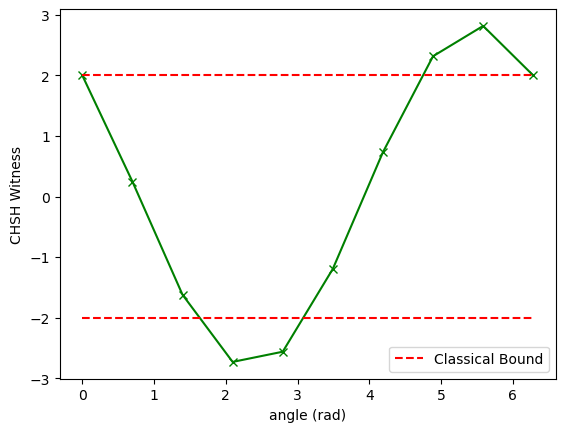

In [53]:
plt.plot(angles, exps, marker='x', ls='-', color='green')
plt.plot(angles, [2]*len(angles), ls='--', color='red', label='Classical Bound')
plt.plot(angles, [-2]*len(angles), ls='--', color='red')
plt.xlabel('angle (rad)')
plt.ylabel('CHSH Witness')
plt.legend(loc=4)

You can see that there are 4 points which are out of the boundary lines. 

Hence, these four points voilates the $CHSH$ inequality